<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Tarefa3_DigitosMnist_Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 3 - Dígitos MNIST com rede totalmente conectada

O objetivo é adaptar o classificador mostrado para a base Fashion MNIST para a base de Dígitos do MNIST, que contem amostras de dígitos manuscritos de 0 a 9, devidamente rotulados. 

O classificador deve treinar até atingir acurácia de 99% e ser interrompido por uma callback. 

Você deve completar os trechos indicados do código. 




In [1]:

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalização das imagens

x_train  = x_train / 255.0
x_test = x_test / 255.0


# declaração do modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2611 - accuracy: 0.9245 - val_loss: 0.1397 - val_accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1159 - accuracy: 0.9651 - val_loss: 0.1009 - val_accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0797 - accuracy: 0.9758 - val_loss: 0.1020 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.0751 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0810 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0364 - accuracy: 0.9884 - val_loss: 0.0720 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step -

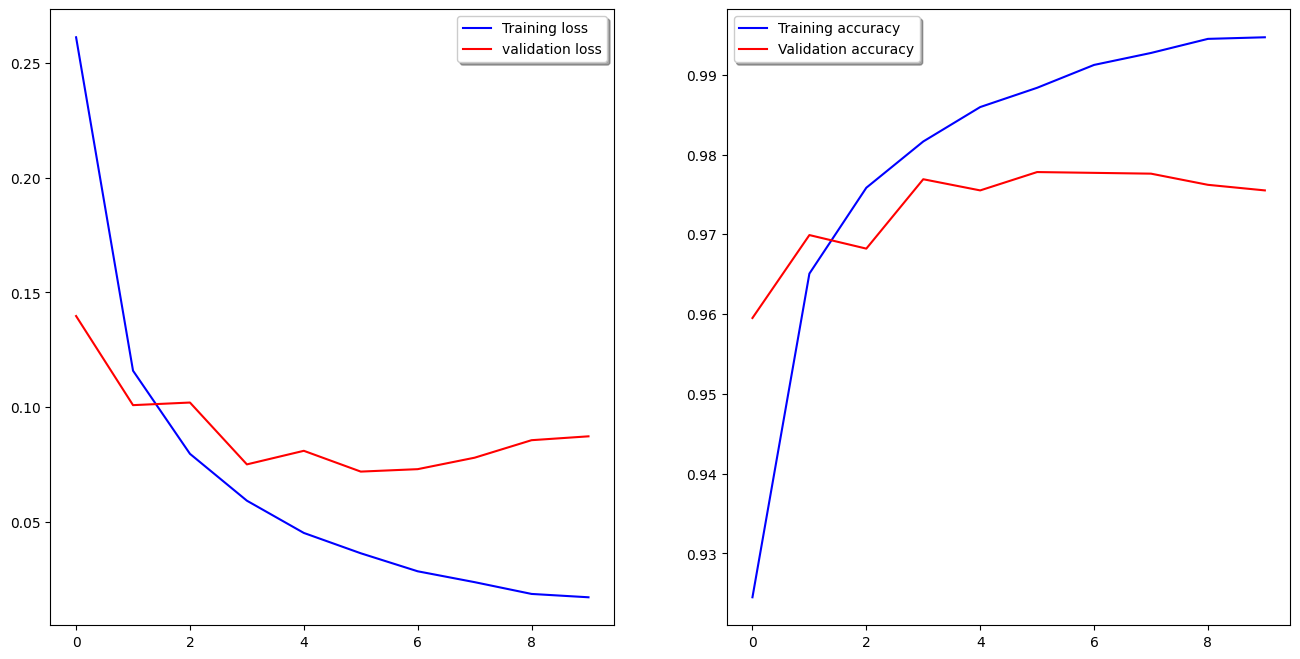

In [2]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


## Versão com callback

In [14]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAtingiu acc > 0.99, cancelando treinamento")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=100, callbacks=[callbacks])

 



2.12.0
Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2572 - accuracy: 0.9270
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1124 - accuracy: 0.9663
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0777 - accuracy: 0.9766
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0585 - accuracy: 0.9826
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0452 - accuracy: 0.9862
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0357 - accuracy: 0.9891
Epoch 7/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.0296 - accuracy: 0.9910
Atingiu acc > 0.99, cancelando treinamento
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0296 - accuracy: 0.9910
